# Выявление закономерностей, определяющих успешность компьютерных игр

**Цель исследования:** С помощью данного анализа мы выявим определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание проекта:** Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Данные представлены до 2016 года. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
    
Файл с данными: games.csv

**Ход исследования:**
* Шаг 1. Подготовка данных: загрузка и изучений общей информации о полученном датасете;
* Шаг 2. Предобработка данных: приведение к верному типу данных, добавление новых столбцов, обработка пропущенных значений, дубликатов и аномалий;
* Шаг 3. Исследовательский анализ данных;
* Шаг 4. Составление потрета каждого пользователя;
* Шаг 5. Проверка гипотез.

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

## Подготовка данных: загрузка и изучений общей информации о полученном датасете

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import missingno as msno

### Считываем данные из файла

In [2]:
data = pd.read_csv('games.csv')

### Выведем на экран первые 10 строк датасета

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Выведем сводную статистику по датасету

**для числовых данных**

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**для строковых данных**

In [5]:
data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Выведем общую информацию по датасету

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** В датасете 16715 строк и 11 столбцов. Названия столбцов необходимо привести к нижнему регистру. В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` есть пропуски, их необходимо обработать. Тип данных в столбце `Year_of_Release` поменяем на int, а в стобце `User_score` на float64.

## Предобработка данных

### Заменим названия столбцов в датасете (приведем к нижнему регистру)

In [7]:
data.columns = map(str.lower, data.columns)

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы

##### Заменим тип данных в стобце year_of_ralize на тип int

В этом столбце есть пропуски, посмотрим на них.

In [9]:
data['year_of_release'].isna().sum()

269

Таких строк меньше 1%, удалим их.

In [10]:
data.dropna(subset=['year_of_release'],inplace=True)

In [11]:
data['year_of_release'].isna().sum()

0

Теперь можем заменить типа данных в столбце `year_of_ralize` на тип int.

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

##### Заменим тип данных в столбце `user_score` на тип float64

В столбце `user_score` встречается значения tbd, посмотрим на эти строки.

In [13]:
data_tbd = data[data['user_score']=='tbd']
data_tbd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Скорее всего tbd - это аббревиатура и значения в этом столбце не определены. Прверим, сколько их.

In [14]:
len(data_tbd) / len(data)

0.14447282013863552

Таких значений целых 14%, удалять их нельзя, заменим на -1, так как оценка от 0 до 10 используется пользователем.

In [15]:
data[data['user_score']=='tbd'] = -1

Теперь можем поменять тип данных.

In [16]:
data['user_score'] = pd.to_numeric(data['user_score'])

Я заменила тип данных в столбце `year_of_ralize`, так год выпуска очевидно целочисленный тип, а также в столбце `user_score` заменила строковый тип данных на float64, чтобы в будущем было проще работать со значениями в этих столбцах. Для этого пришлось заменить значения в некоторых строках, а несколько строк удалить.

Проверим, все ли получилось.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     9303 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9818 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Обработаем пропуски

Определим, в каких столбцах есть пропуски, часть пропусков я уже обработала.

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7143
user_score         6607
rating             6628
dtype: int64

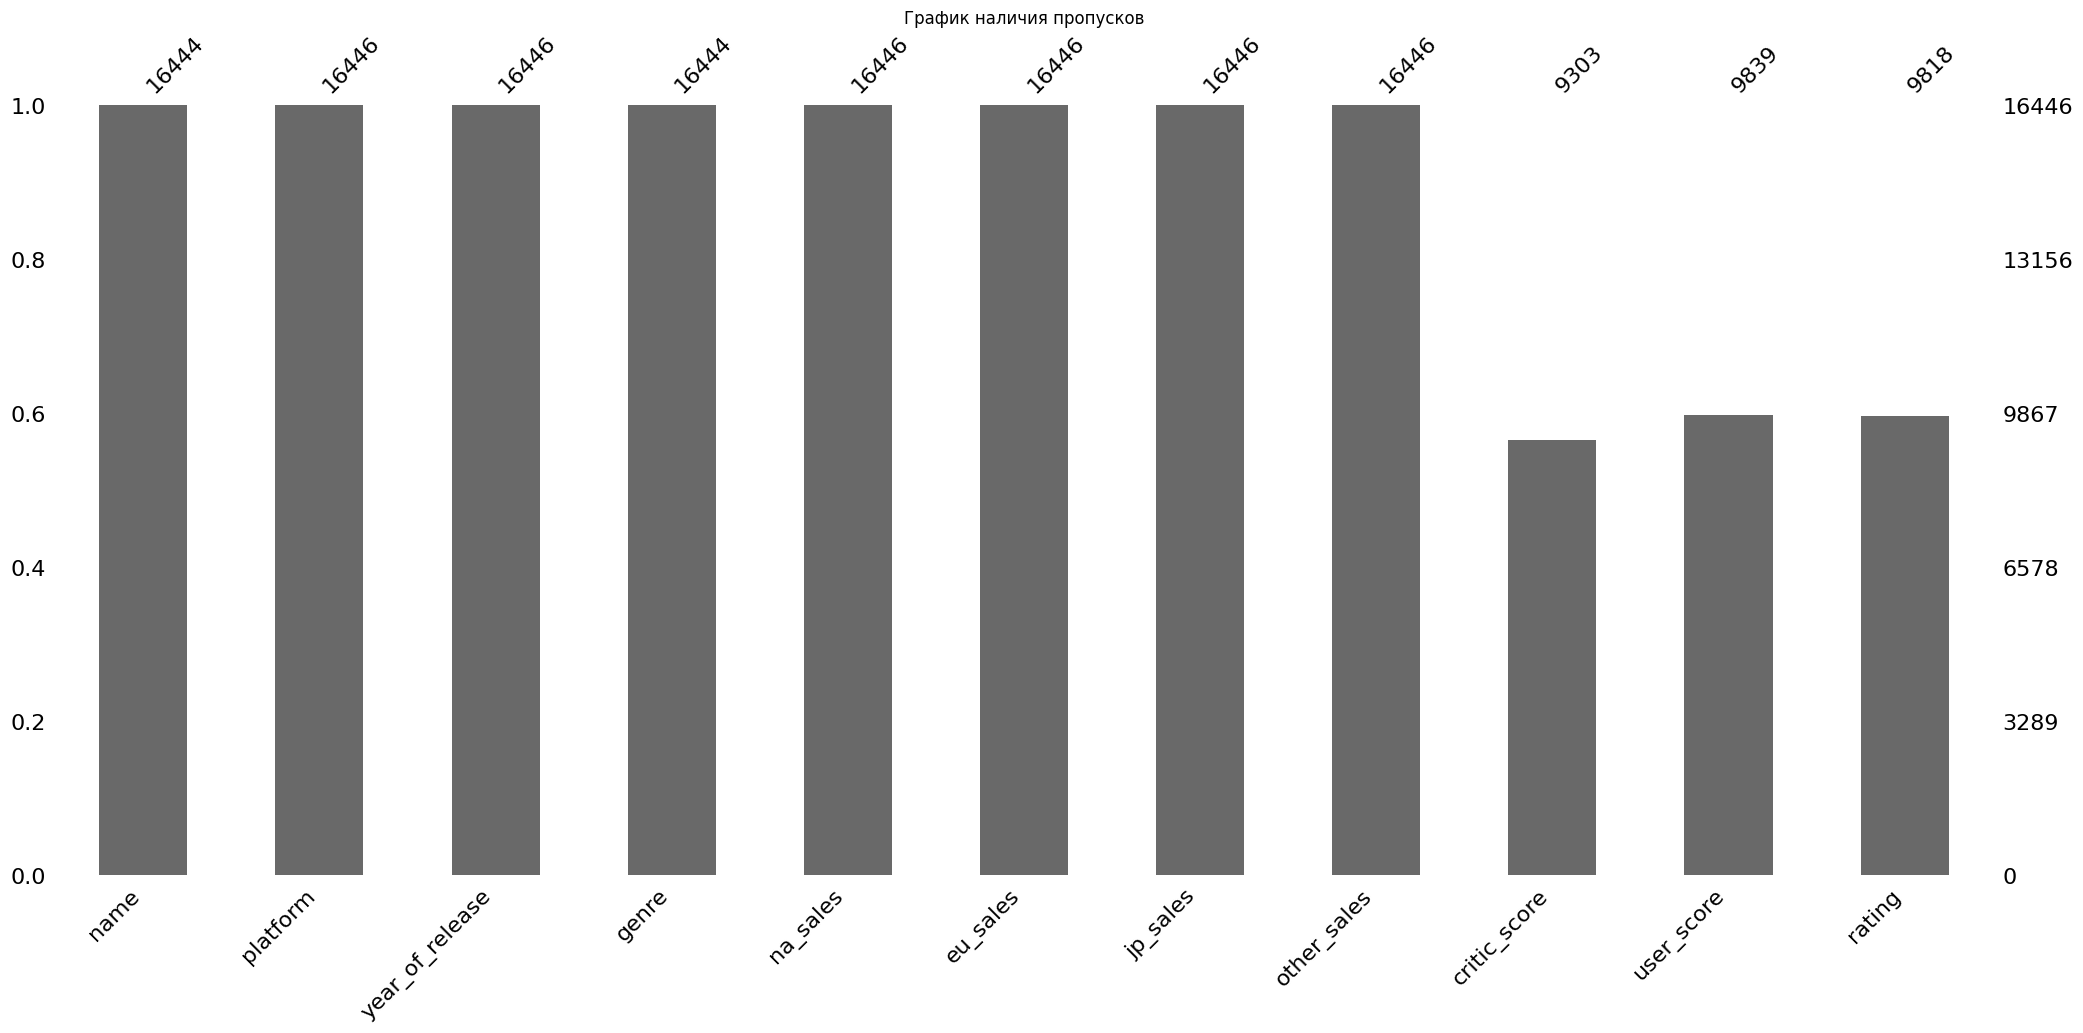

In [19]:
msno.bar(data)
plt.title('График наличия пропусков')
plt.show()

Удалим строки с пропусками в столбцах `name` и `genre`. Данные восстановить невозможно, пропусков меньше 1%, а данные из этих столбцов нам понадобятся для анализа.

In [20]:
columns = ['name', 'genre']
for col in columns:
    data.dropna(subset=[col],inplace=True)

Пропуски в столбцах `critic_score` `user_score` удалять нельзя, их слишком много. Заменять на медиану и среднее тоже не стоит. Польватели и критики могут ставить оценки. которые сильно отличаются друг от друга. Заменим пропущенные значени в этих столбцах на 0.

In [21]:
columns = ['critic_score', 'user_score']
for col in columns:
    data[col]=data[col].fillna(-1)

Пропуски в столбце `rating` относится к категориальному типу данных. Информацию о рейтинге игры можно было бы найти в других источниках, но заменим пропуски на 'unknown'.

In [22]:
data['rating']=data['rating'].fillna('unknown')

Проверим, все ли получилось.

In [23]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски удалены. У появления пропусков данных обычно две причины: человеческий фактор и сбой системы сбора информации. Я думаю, на появление пропусков в данном датасете скорее повлиял второй фактор.

### Обработаем дубликаты

### Посмотрим, есть ли явные дубликаты и удалим их при наличиии.

In [24]:
data.duplicated().sum()

2375

In [25]:
data = data.drop_duplicates()

In [26]:
data.duplicated().sum()

0

### Удалили явные дубликаты, их было довольно много. Теперь посмотрим на неявные дубликаты  в столбцах `name` и `genre`

In [27]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', -1, 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG',
       'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов нет.

In [28]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', -1,
       'Strategy'], dtype=object)

Дубликатов нет.

### Обработаем аномальные значения

В столбце `genre` есть непонятное значение: -1. Посмотрим, в скольких строках встречается такое значение.

In [30]:
len(data[data['genre']==-1])

1

В одной строке встречается значение -1. Удалим ее.

In [31]:
data = data[data['genre']!=-1]

In [32]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

##### Построим гистограммы для столбцов с числовыми данными и посмотрим выбивающиеся значения

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14068 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14068 non-null  object 
 1   platform         14068 non-null  object 
 2   year_of_release  14068 non-null  int32  
 3   genre            14068 non-null  object 
 4   na_sales         14068 non-null  float64
 5   eu_sales         14068 non-null  float64
 6   jp_sales         14068 non-null  float64
 7   other_sales      14068 non-null  float64
 8   critic_score     14068 non-null  float64
 9   user_score       14068 non-null  float64
 10  rating           14068 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.2+ MB


Гистограмма для столбца `year_of_release`

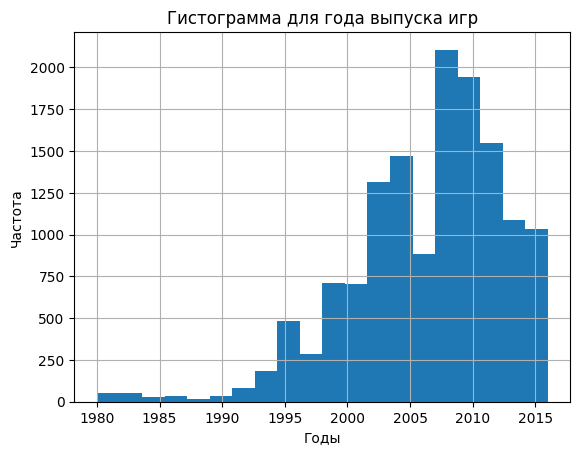

In [34]:
data['year_of_release'].hist(bins=20)
plt.xlabel('Годы')
plt.ylabel('Частота')
plt.title('Гистограмма для года выпуска игр')
plt.show()

In [35]:
data['year_of_release'].describe()

count    14068.000000
mean      2006.323429
std          6.174107
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64

Год выхода игр с 1980 по 2016, большинство игр в датасете вышли в 2006 году. Аномальных значений не обнаружено.

Гистограмма для столбца `critic_score`

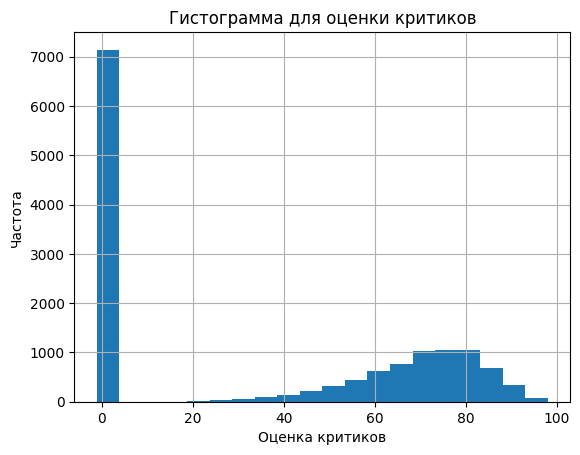

In [36]:
data['critic_score'].hist(bins=20)
plt.title('Гистограмма для оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Частота')
plt.show()

In [37]:
data['critic_score'].describe()

count    14068.000000
mean        34.082457
std         36.926848
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         72.000000
max         98.000000
Name: critic_score, dtype: float64

Гистограмма для столбца `user_score`

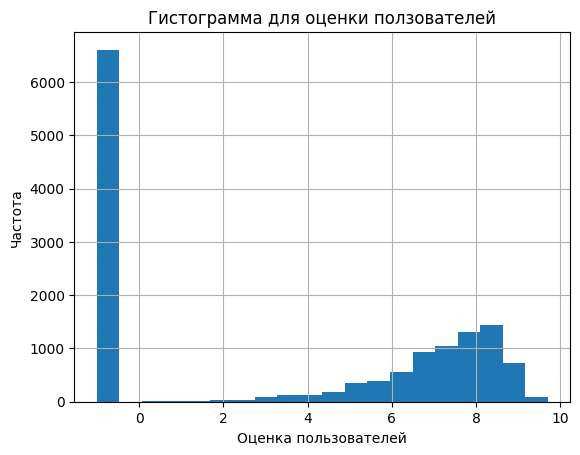

In [38]:
data['user_score'].hist(bins=20)
plt.title('Гистограмма для оценки ползователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
plt.show()

In [39]:
data['user_score'].describe()

count    14068.000000
mean         3.310975
std          4.200206
min         -1.000000
25%         -1.000000
50%          4.300000
75%          7.600000
max          9.700000
Name: user_score, dtype: float64

Аномальных значений в столбцах `critic_score` и `user_score` не обнаружено. Значением -1 мы сами заменили пропуски в этих столбцах.

##### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [40]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим, все ли получилось/

In [41]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


##### Вывод

Мы выполнили преобработку данных:
* заменили названия столбцов;
* привели типы данных к нужным типам;
* обработали пропущенные значения, дубликаты, аномальные значения;
* создали новый столбец с суммарными продажами во всех регионах.

Данные сократились, но стали значительно чище, а значит выводы будут более точными. Можем приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось за разные годы

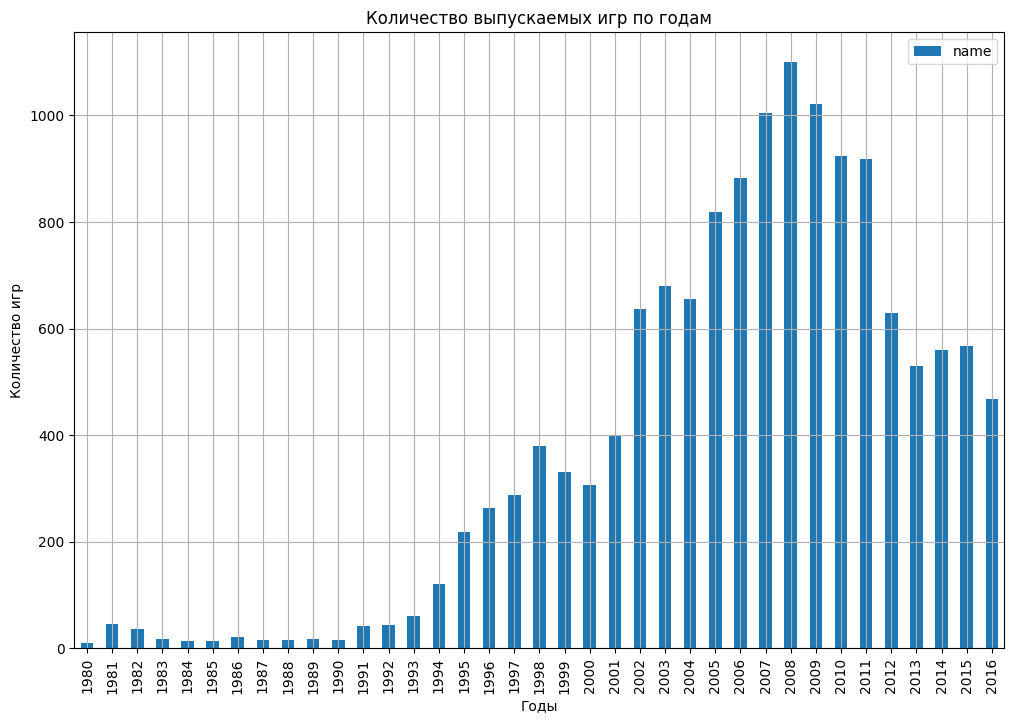

In [42]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Количество выпускаемых игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

In [43]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
year_of_release,
2008,1101
2009,1021
2007,1005
2010,924
2011,919
2006,882
2005,818
2003,680
2004,655


Больше всего игр было выпущено в 2008 году - 1101, меньше всего в 1980 - всего 9. Колчество выпускаемых игр в год росло до 2008 года, а потом начало снижаться.

### Посмотрим, как менялись продажи по платформам

In [44]:
platform_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
platform_sales

,sum_sales
platform,
PS2,1171.19
X360,948.74
PS3,921.09
Wii,791.91
PS,714.26
DS,655.36
PS4,314.00
PSP,273.11
GBA,263.70


Больше всего продаж за все годы у первых 6 платформ: "PS2", "X360", "PS3", "Wii", "PS", "DS", у остальных сумма продаж в два и более раз меньше, на последнем месте "PCFX".

In [45]:
top_6_platforms = list(platform_sales.index[:6])
top_6_platforms

['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']

In [46]:
top_years_sum = data.query('platform in @top_6_platforms').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
top_years_sum

,sum_sales
year_of_release,
1985,0.02
1994,6.03
1995,35.96
1996,94.70
1997,136.12
1998,169.49
1999,142.19
2000,121.62
2001,194.09


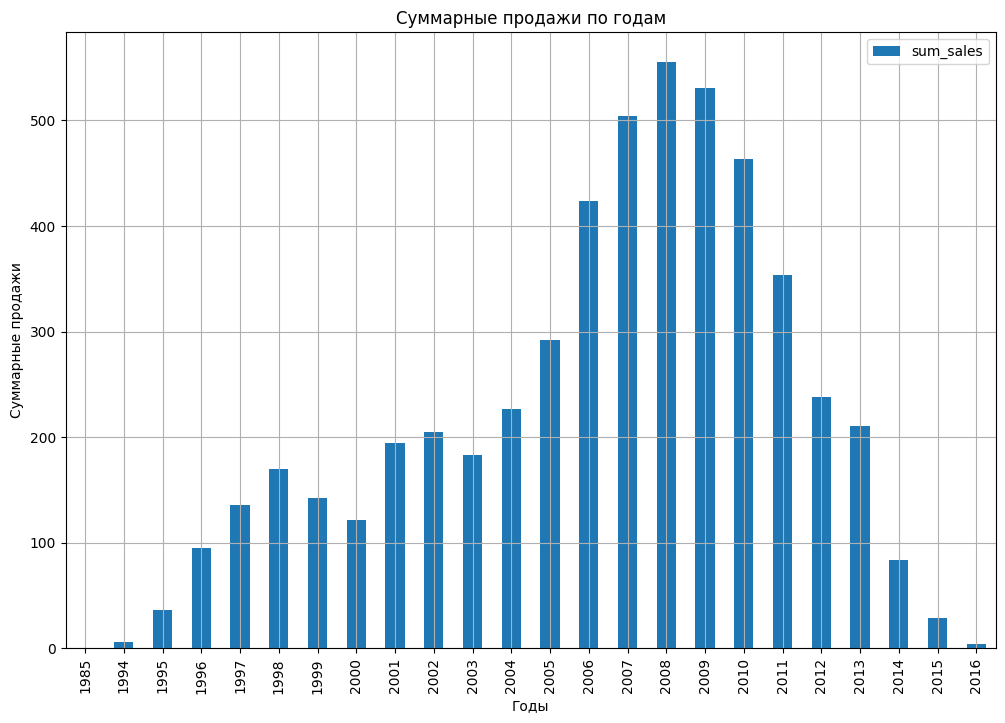

In [47]:
top_years_sum.plot(kind='bar', grid=True, figsize=(12,8))
plt.title('Суммарные продажи по годам')
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.show()

У самых популярных платформ больше всего игр было продано в 2008 году, меньше всего в 1985 и 2016 году. До 2008 года суммы продаж росли, потом начали падать.

In [48]:
time_of_platform = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
time_of_platform.columns = ['year_of_release_min', 'year_of_release_max']
time_of_platform['life_time'] = time_of_platform['year_of_release_max'] - time_of_platform['year_of_release_min']
time_of_platform.sort_values(by='life_time', ascending = False)

,year_of_release_min,year_of_release_max,life_time
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
PS3,2006,2016,10


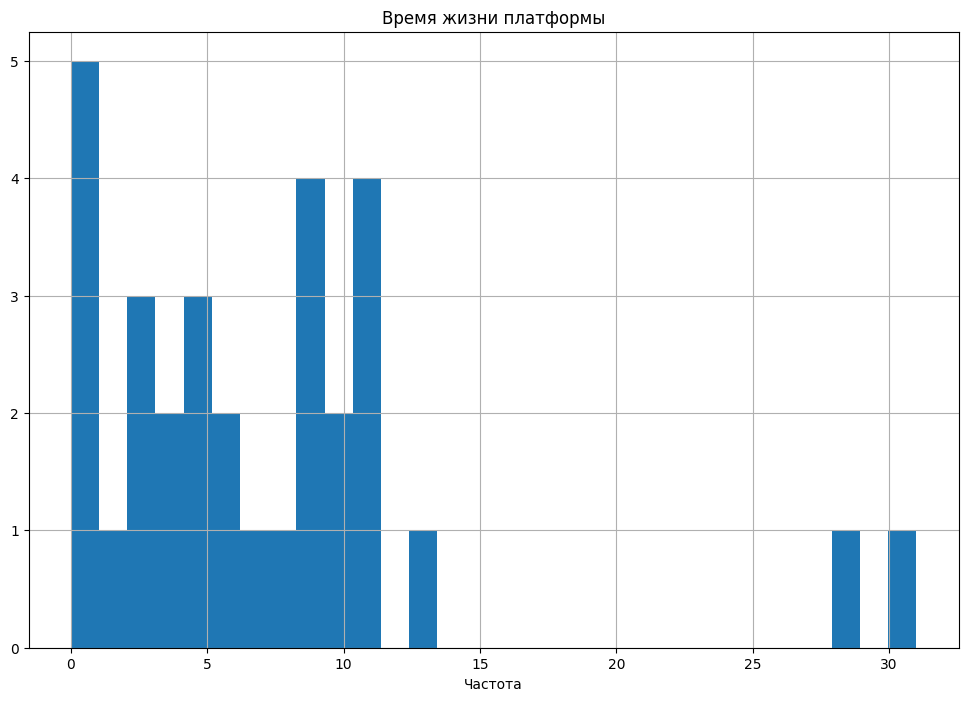

In [49]:
time_of_platform['life_time'].hist(figsize=(12,8), bins=30)
plt.title('Время жизни платформы')
plt.xlabel('Время жизни, годы')
plt.xlabel('Частота')
plt.show()

In [50]:
time_of_platform['life_time'].describe()

count    31.000000
mean      7.580645
std       6.989393
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: life_time, dtype: float64

На графике мы видим, что в основном платформы существуют не больше 11 лет, 25% платформ "не доживают" до трех лет, средний показатель - 6 лет. Есть также платформы-долгожители, они существуют 28 лет и 31 год.

### Возьмем данные за соответствующий актуальный период

Так как 75% платформ доживают до 10 лет,а среднее время жизни платформы 7 лет, возьмем данные за последние 4 года.

In [51]:
result_data = data[data['year_of_release'] > 2012]
result_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Выясним, какие платформы лидируют по продажам

In [52]:
result_data_platform_sum = result_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
result_data_platform_sum

,sum_sales
platform,
PS4,314.00
PS3,180.10
XOne,158.77
3DS,141.70
X360,135.43
WiiU,64.23
PC,39.34
PSV,32.68
Wii,10.87


Лидирует по продажам платформа "PS4", на последнем место "DS".

### Продажи какиех платформ растут, а каких падают

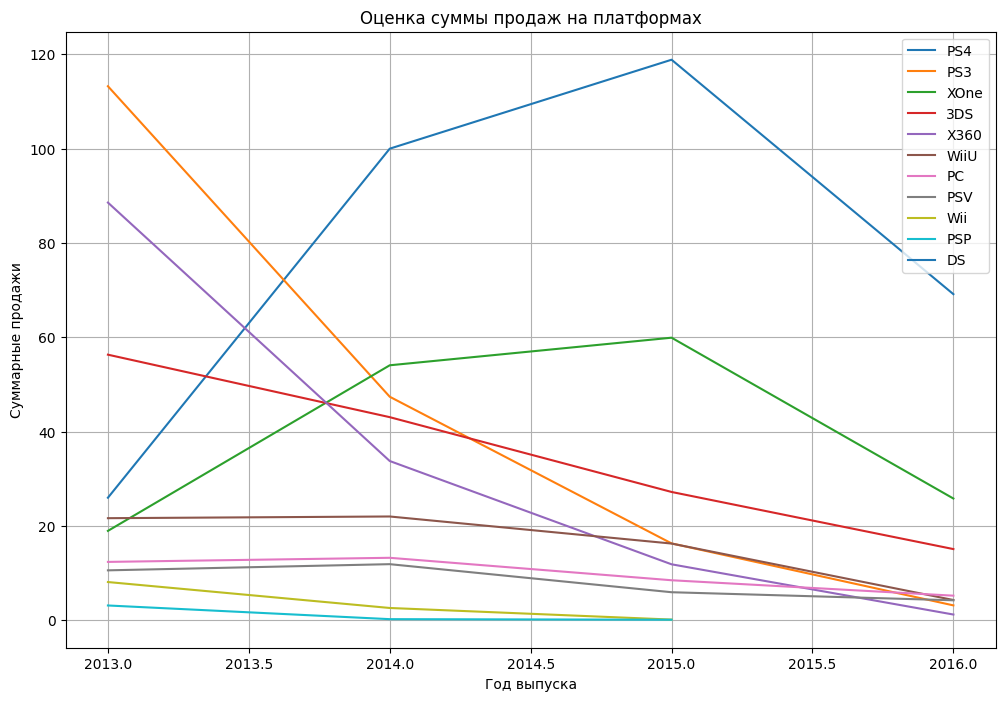

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
for platform in result_data_platform_sum.index:
    result_data.loc[result_data['platform'] == platform].groupby('year_of_release')['sum_sales'].sum().plot(label=platform, ax=ax)
ax.set(title='Оценка суммы продаж на платформах', xlabel='Год выпуска', ylabel='Суммарные продажи')
plt.legend()
plt.grid(True)
plt.show() 

Последние несколько лет суммы продаж всех платформ падают, пожалуй, самыми прибыльными остаются PS4, PS3 и XOne.

### Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам

Оставим 5 наиболее перспективных платформ актуального периода.

In [54]:
top_5_platform = list(result_data_platform_sum.index[:5])
top_5_platform

['PS4', 'PS3', 'XOne', '3DS', 'X360']

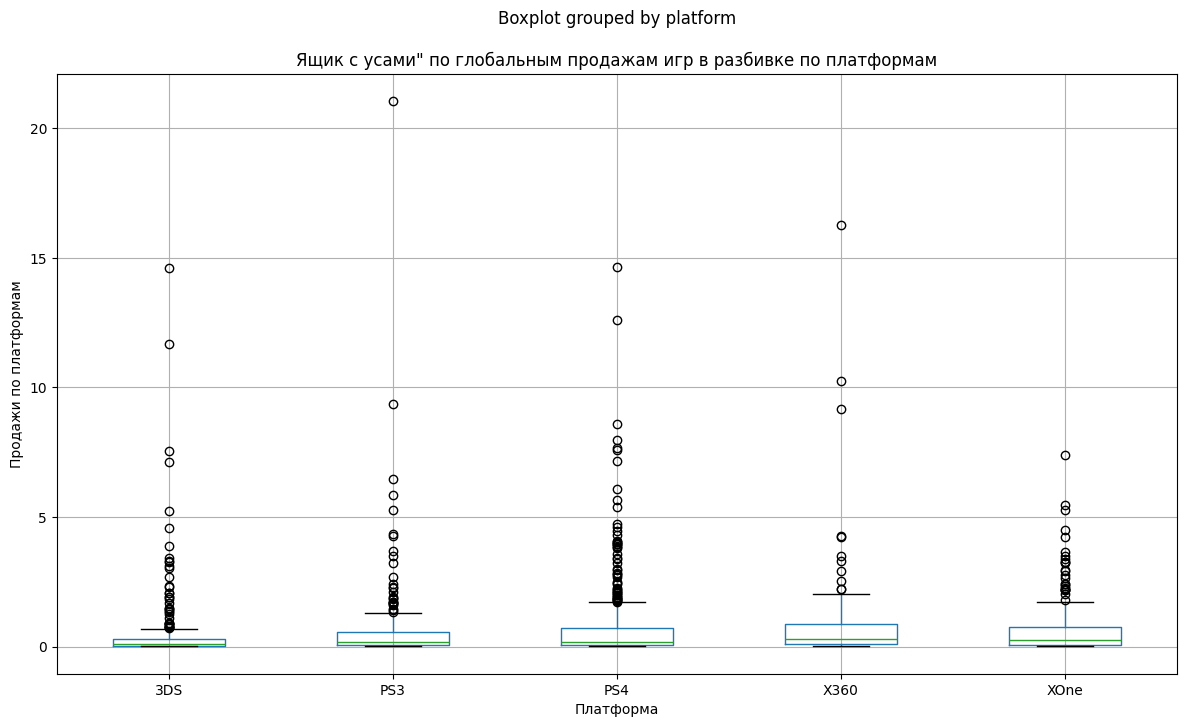

In [55]:
result_data.query('platform in @top_5_platform').boxplot(column='sum_sales', by='platform', figsize = (14,8))
plt.title('Ящик с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.show()

Построили на одном графике "ящик с усами" для глобальных продаж в разбивке по платформам. По всем платформам есть выбросы по продажам, по некотором (например, Wii) очень значительные. 

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы покупателей и критиков.

Выберем одну популярную платформу, например PS4.

In [56]:
data_ps4 = result_data[(result_data['platform']=='PS4') & (result_data['user_score'] > -1) & (result_data['critic_score'] > -1)]

Построим диаграмму рассеяния между отзывами пользователей и продажами и найдем коэффициент корреляции.

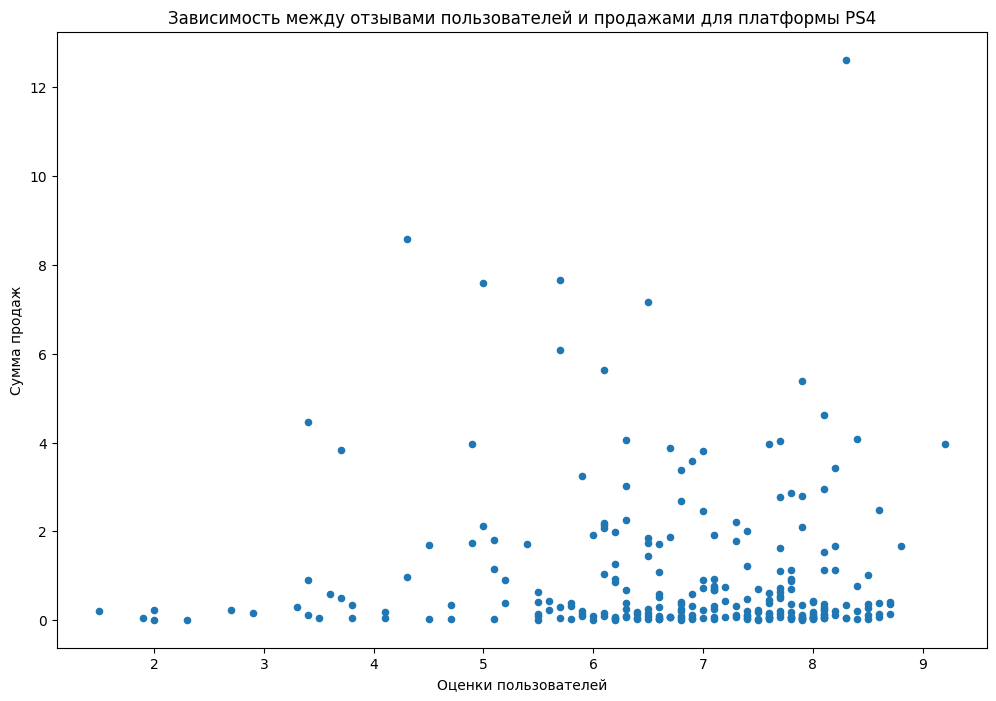

In [57]:
data_ps4.plot(kind='scatter', x='user_score', y='sum_sales', figsize=(12,8))
plt.title('Зависимость между отзывами пользователей и продажами для платформы PS4')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
plt.show()

In [58]:
data_ps4['user_score'].corr(data_ps4['sum_sales'])

-0.03362497596528878

Коэффициент корреляции отрицательный и равен 0,03, корреляция очень слабая, следовательно связь между оценками пользователей и суммой продаж низкая или имеет более сложный характер. Думаю, оценки критиков больше вляют на сумму продаж.

Построим диаграмму рассеяния между отзывами критиков и продажами и найдем коэффициент корреляции.

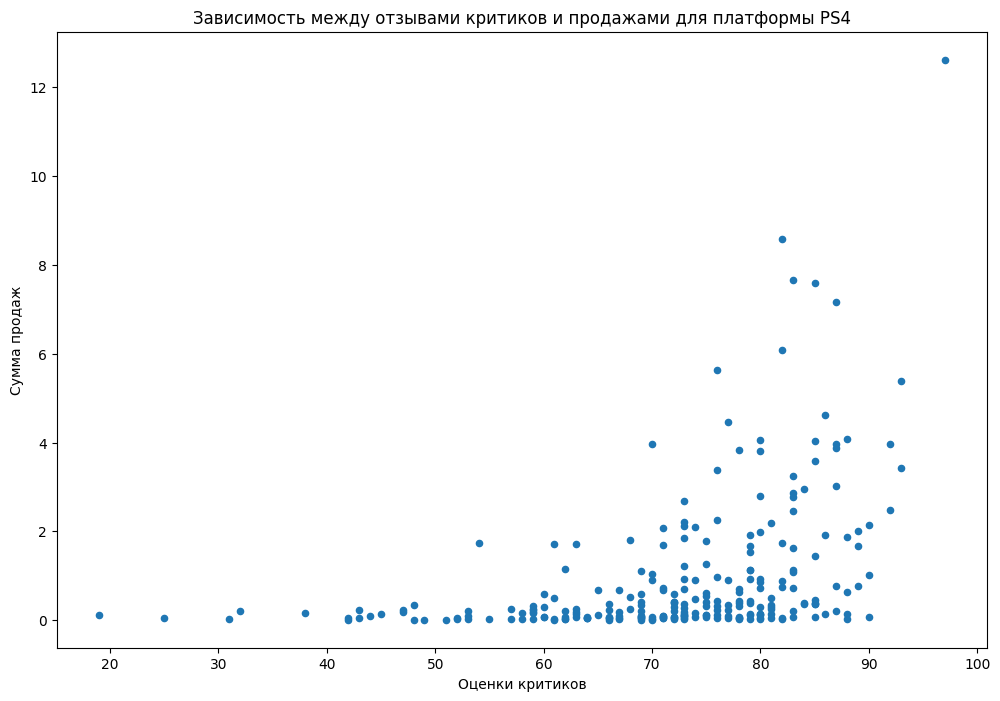

In [59]:
data_ps4.plot(kind='scatter', x='critic_score', y='sum_sales', figsize=(12,8))
plt.title('Зависимость между отзывами критиков и продажами для платформы PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
plt.show()

In [60]:
data_ps4['critic_score'].corr(data_ps4['sum_sales'])

0.40589480145836687

Коэффициент корреляции положительный и равен 0.4, следовательно связь между оценками критиков и суммой продаж больше, как я и предпологала, но все равно нельзя точно сказать, что оценка критиков влияет на сумму продаж.

Посмотрим те же данные еще на двух популярных платформах и сравним.

**Платформа PS3**

In [61]:
data_ps3 = result_data[(result_data['platform']=='PS3')  & (result_data['user_score'] > -1) & (result_data['critic_score'] > -1)]

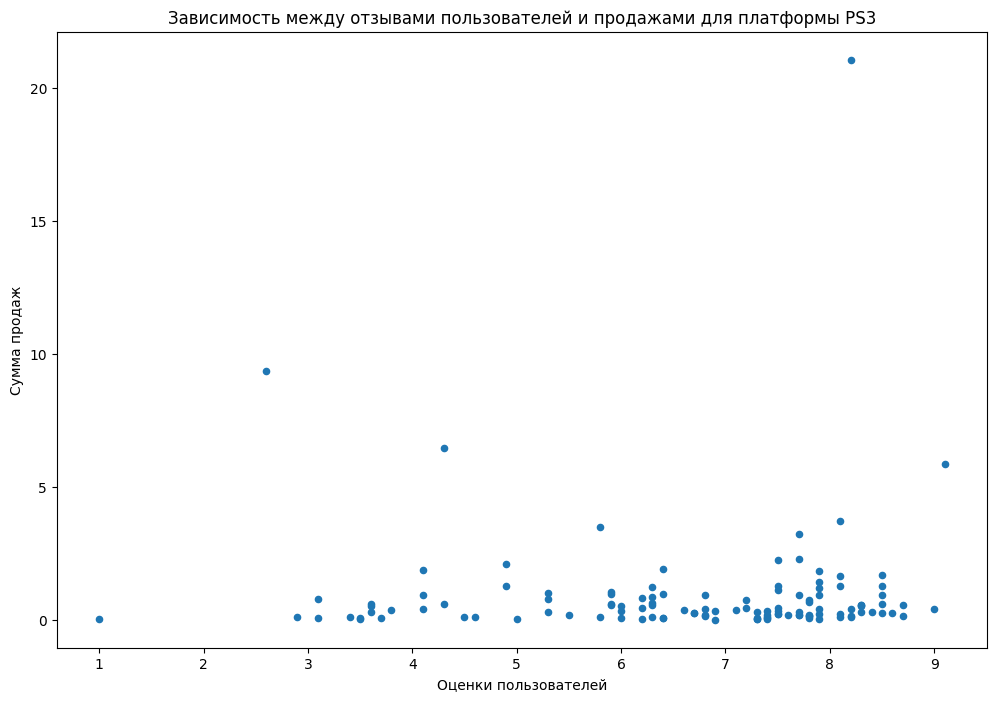

In [62]:
data_ps3.plot(kind='scatter', x='user_score', y='sum_sales', figsize=(12,8))
plt.title('Зависимость между отзывами пользователей и продажами для платформы PS3')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
plt.show()

In [63]:
data_ps3['user_score'].corr(data_ps3['sum_sales'])

0.02269094327112414

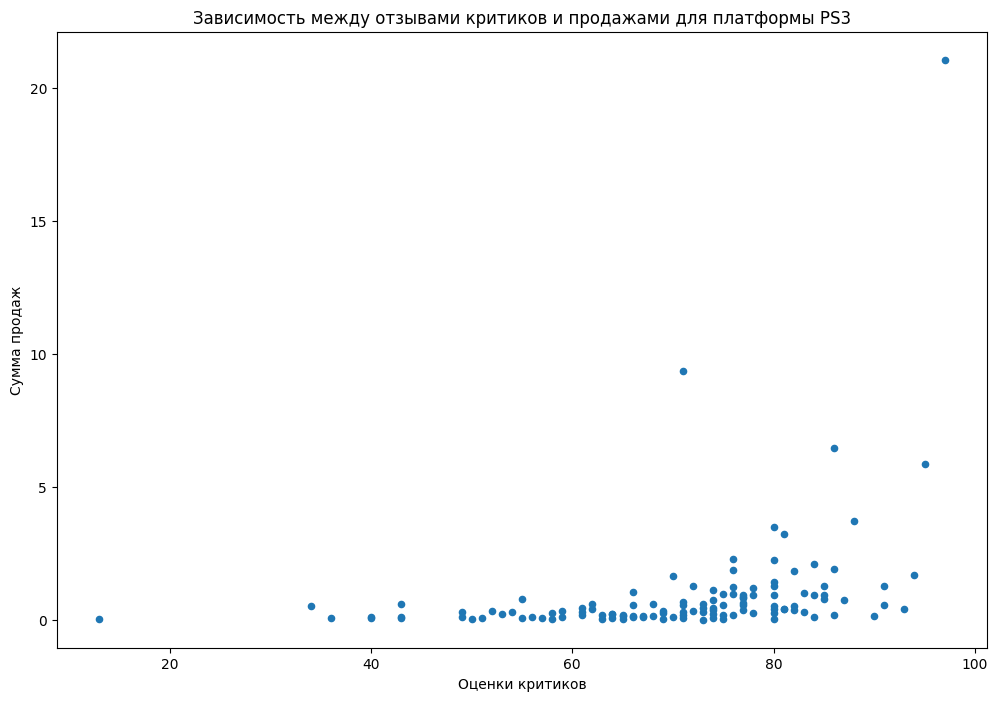

In [64]:
data_ps3.plot(kind='scatter', x='critic_score', y='sum_sales', figsize=(12,8))
plt.title('Зависимость между отзывами критиков и продажами для платформы PS3')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
plt.show()

In [65]:
data_ps3['critic_score'].corr(data_ps3['sum_sales'])

0.33380663565061736

**Платформа XOne**

In [66]:
data_xone = result_data[(result_data['platform']=='XOne')  & (result_data['user_score'] > -1) & (result_data['critic_score'] > -1)]

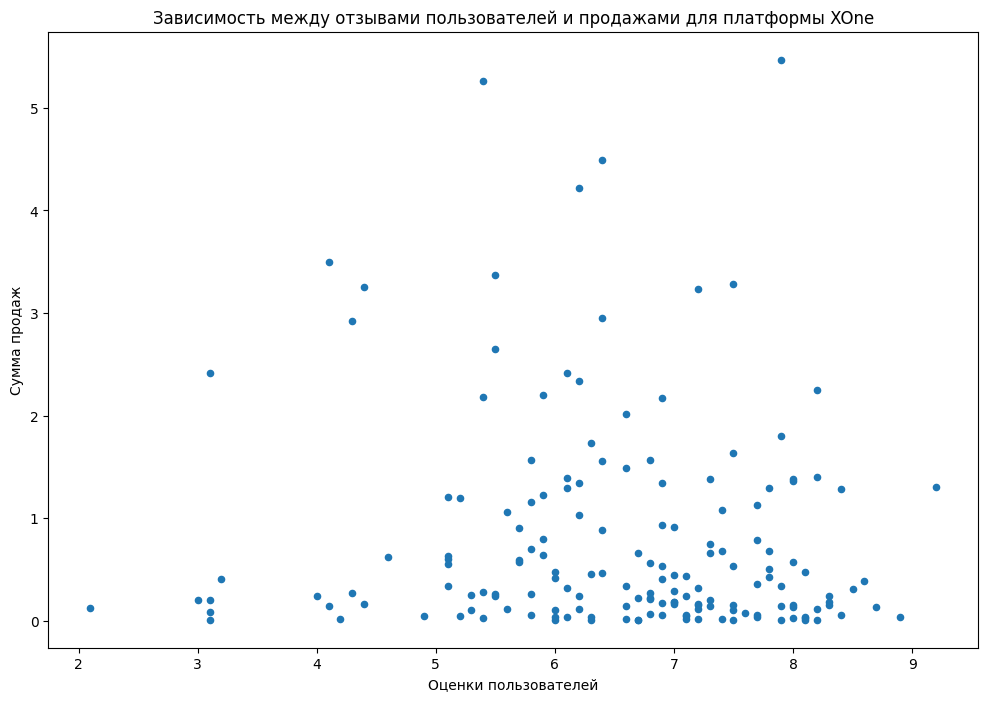

In [67]:
data_xone.plot(kind='scatter', x='user_score', y='sum_sales', figsize=(12,8))
plt.title('Зависимость между отзывами пользователей и продажами для платформы XOne')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
plt.show()

In [68]:
data_xone['user_score'].corr(data_xone['sum_sales'])

-0.09400318326920852

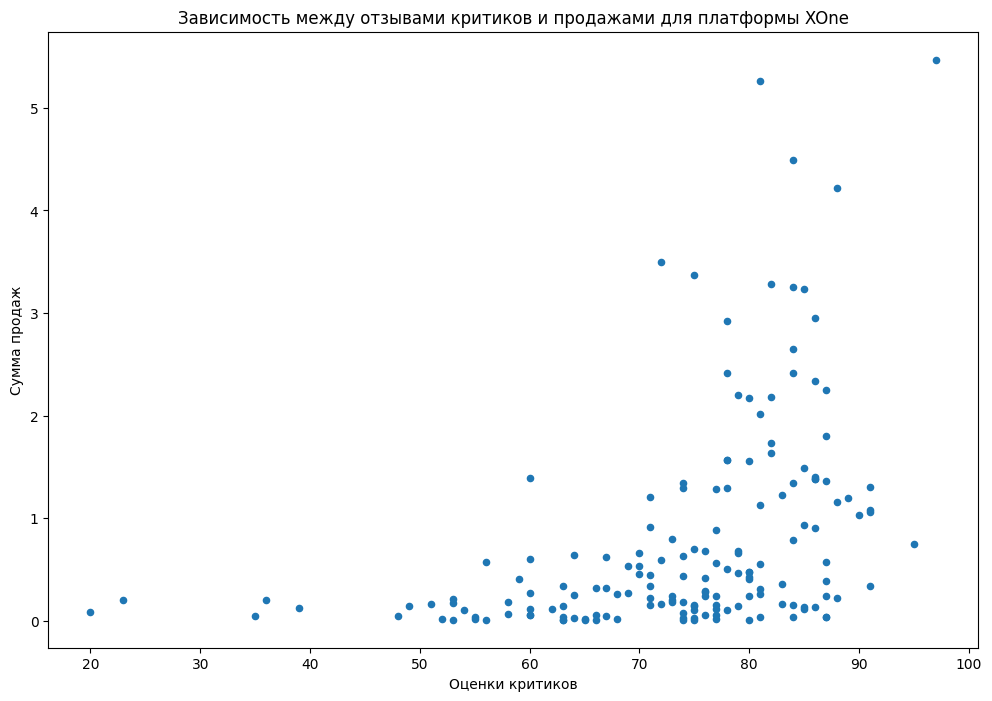

In [69]:
data_xone.plot(kind='scatter', x='critic_score', y='sum_sales', figsize=(12,8))
plt.title('Зависимость между отзывами критиков и продажами для платформы XOne')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
plt.show()

In [70]:
data_xone['critic_score'].corr(data_xone['sum_sales'])

0.41042203561296375

### Соотнесем выводы с продажами игр на других платформах

На других платформах связь между оценками пользователей и критиков и суммой продаж также очень слабая и не имеет линейный характер. Мы можем предположить, что оценки пользователей и критиков не влияют на суммы продаж.

### Посмотрим на общее распределение игр по жанрам

In [71]:
data_genre = result_data.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
data_genre

,sum_sales
genre,
Shooter,0.505
Sports,0.290
Platform,0.250
Fighting,0.130
Racing,0.125
Role-Playing,0.125
Action,0.110
Misc,0.110
Simulation,0.100


Построим график

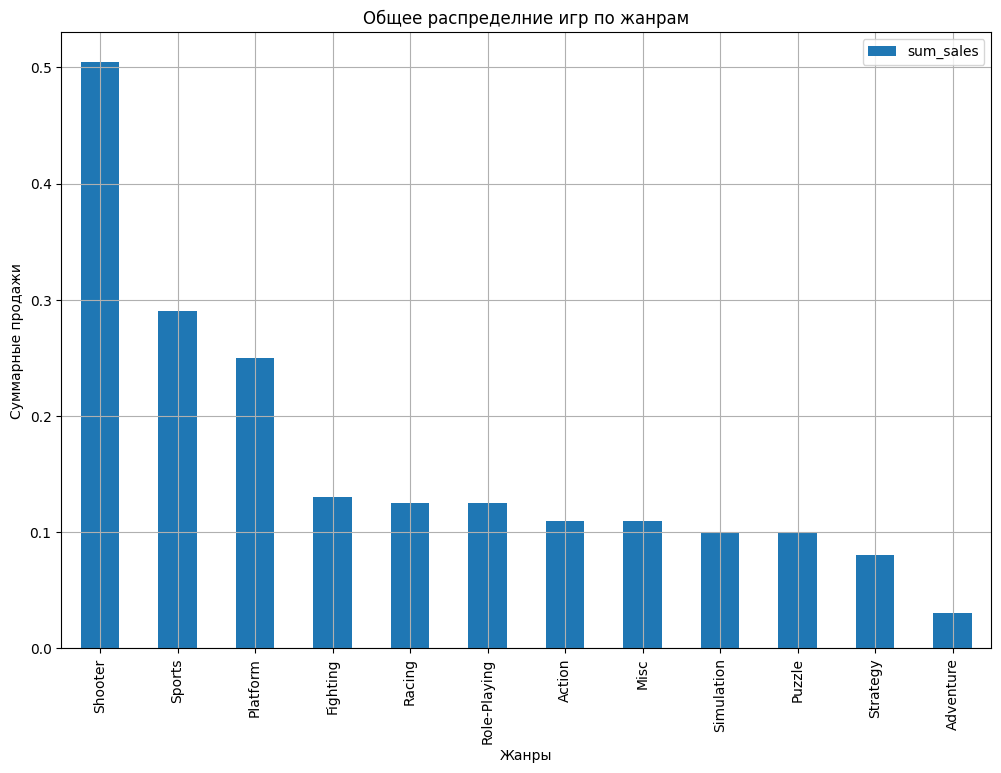

In [72]:
data_genre.plot(kind='bar', grid=True, figsize=(12,8))
plt.title('Общее распределние игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.show()

На графике мы видим, что самые прибыльные игры в жанре "Shooter", "Sports" и "Platform", на последнем месте "Adventure".

### Вывод

На основе проведенного исследовательского анализа можно сказать следующее:
* Больше всего игр было выпущено в 2008 году - 1101, меньше всего в 1980 - всего 9. Количество выпускаемых игр в год росло до 2008 года, а потом начало снижаться;
* Больше всего продаж за все годы у первых 6 платформ: "PS2", "X360", "PS3", "Wii", "PS", "DS", у остальных сумма продаж в два и более раз меньше, на последнем месте "PCFX". У самых популярных платформ больше всего игр было продано в 2008 году, меньше всего в 1985 и 2016 году. До 2008 года суммы продаж росли, потом начали падать;
* В основном платформы существуют не больше 11 лет, 25% платформ "не доживают" до трех лет, средний показатель - 6 лет. Есть также платформы-долгожители, они существуют 28 лет и 31 год;
* Для дальнейшего анализа я взяла данные за последние 4 года. Лидирует по продажам платформа "PS4", на последнем место "DS";
* Последние несколько лет суммы продаж всех платформ падают, пожалуй, самыми прибыльными остаются PS4, PS3 и XOne;
* Построив график "ящик с усами" для глобальных продаж в разбивке по платформам, я выяснила, что по всем платформам есть выбросы по продажам, по некоторым (например, Wii) очень значительные;
* Изучив связь между оценками пользователей и критиков и суммой продаж, линейной связи я не обнаружила Ее либо нет, либо она имеет более сложную природу;
* На графике мы видим, что самые прибыльные игры в жанре "Shooter", "Sports" и "Platform", на последнем месте "Adventure".

## Составление портрета пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5)

**NA - продажи в Северной Америке**

In [73]:
na = result_data.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False)
na  = na.loc[:'3DS']
na

,na_sales
platform,
PS4,108.62
XOne,92.77
X360,80.90
PS3,63.27
3DS,37.71


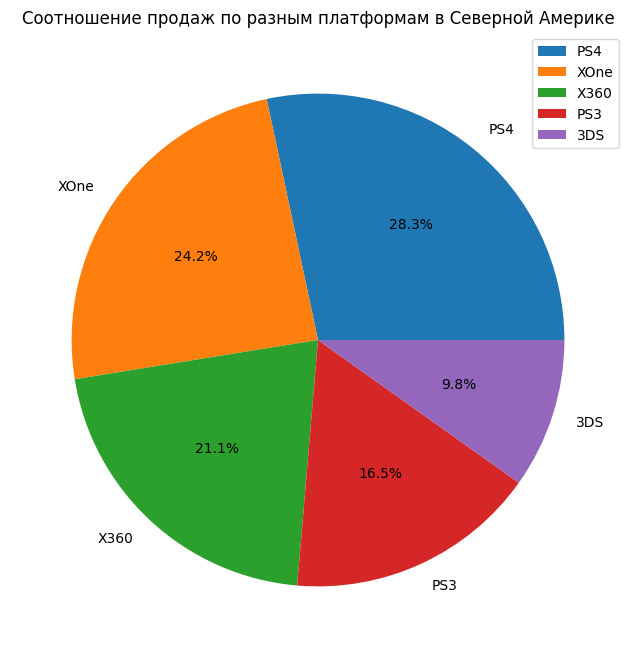

In [74]:
na.plot(kind='pie', y='na_sales', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение продаж по разным платформам в Северной Америке')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

В Северной Америке самой популярной платформой является PS4 (28,3%), в целом продажи между пятью лидирующими платформами распределены почти равномерно.

**EU - продажи в Европе**

In [75]:
eu = result_data.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)
eu  = eu.loc[:'3DS']
eu

,eu_sales
platform,
PS4,141.09
PS3,67.23
XOne,51.43
X360,42.04
3DS,30.11


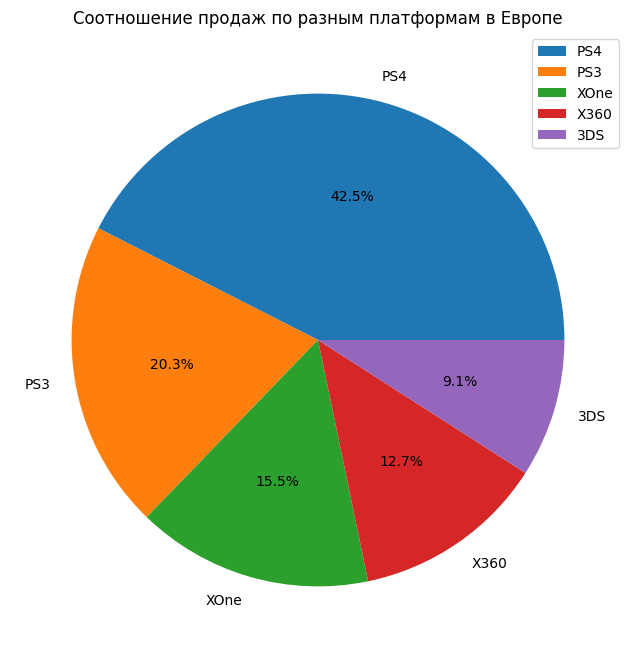

In [76]:
eu.plot(kind='pie', y='eu_sales', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение продаж по разным платформам в Европе')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

В Европе PS4 (42,5%) лидирует, на ее долю приходится одна треть продаж среди пяти самых популярных платформ.

**JP - продажи в Японии**

In [77]:
jp = result_data.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False)
jp  = jp.loc[:'WiiU']
jp

,jp_sales
platform,
3DS,67.70
PS3,22.98
PSV,18.48
PS4,15.96
WiiU,10.88


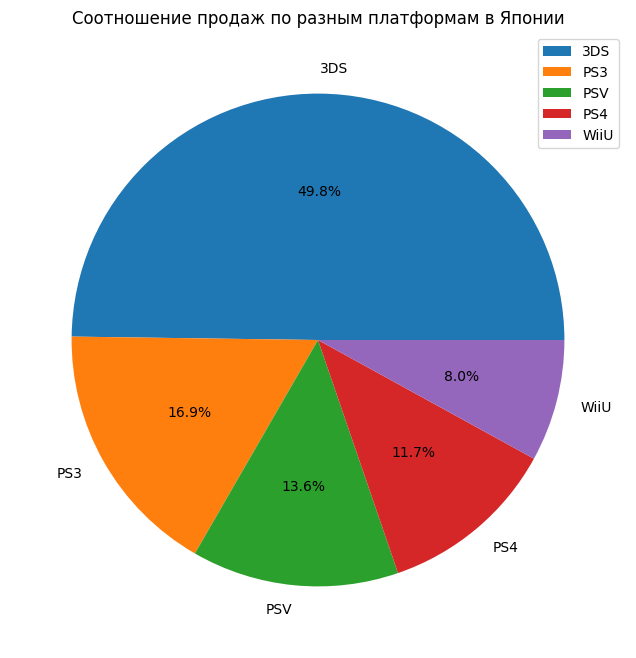

In [78]:
jp.plot(kind='pie', y='jp_sales', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение продаж по разным платформам в Японии')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

А вот в Японии половина продаж среди пяти самых популярных платформ приходится на долю 3DS (49,8%). PS4 только на 4 месте (11,7%).

### Самые популярные жанры (топ-5)

**NA - продажи в Северной Америке**

In [79]:
na = result_data.pivot_table(index='genre', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False)
na  = na.loc[:'Misc']
na

,na_sales
genre,
Action,124.66
Shooter,109.61
Sports,65.17
Role-Playing,46.40
Misc,26.64


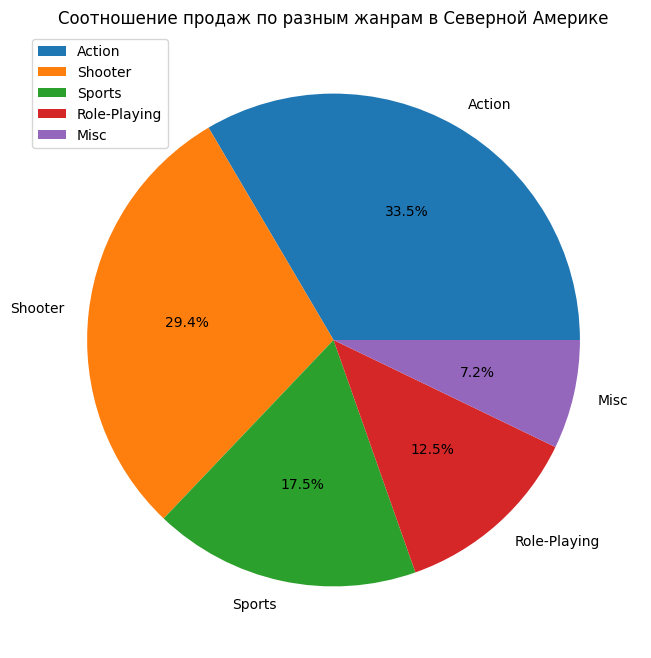

In [80]:
na.plot(kind='pie', y='na_sales', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение продаж по разным жанрам в Северной Америке')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

В Северной Америке лидирует жанр "Action" (33,5%), за ним с небольшим отрывом идет жанр "Shooter" (29,4%). Жанры "Sports" (17,5%), "Role-Playing" (12,5%), "Misc" (7,2%) занимают 3, 4 и 5 места соответственно.

**EU - продажи в Европе**

In [81]:
eu = result_data.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)
eu  = eu.loc[:'Racing']
eu

,eu_sales
genre,
Action,116.44
Shooter,87.72
Sports,60.22
Role-Playing,36.97
Racing,20.09


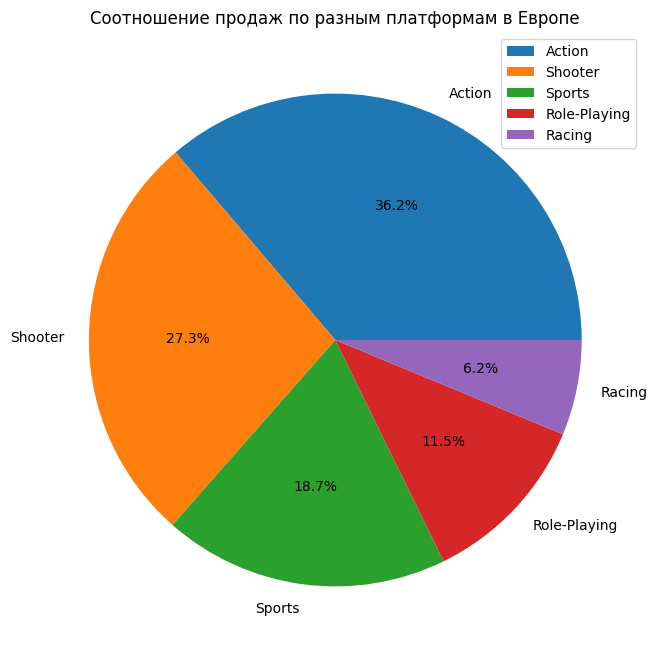

In [82]:
eu.plot(kind='pie', y='eu_sales', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение продаж по разным платформам в Европе')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

В Европе  также лидирует жанр "Action" (36,2%), за ним с небольшим отрывом идет жанр "Shooter" (27,3%). Жанры "Sports" (18,7%), "Role-Playing" (11.5%), "занимают 3, 4, а на последнем место по популярность здесь "Racing" (6,2%), а не "Misc".

**JP - продажи в Японии**

In [83]:
jp = result_data.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False)
jp  = jp.loc[:'Shooter']
jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.02
Misc,9.20
Fighting,7.62
Shooter,6.60


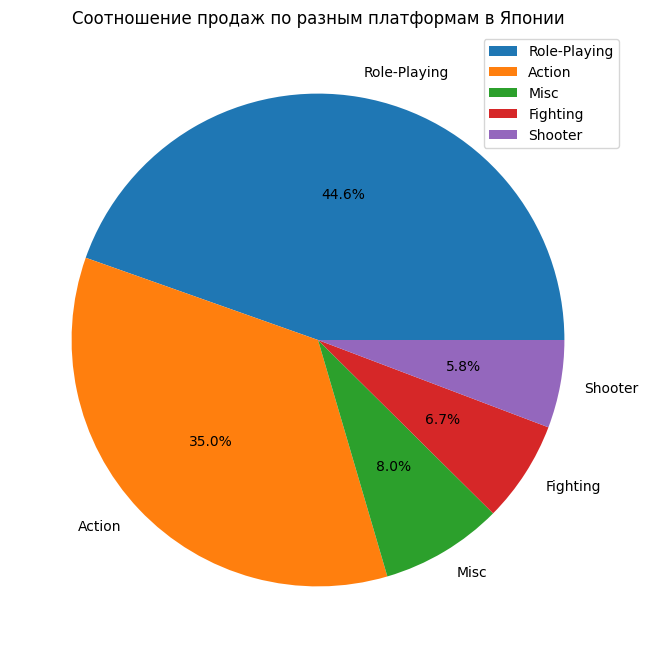

In [84]:
jp.plot(kind='pie', y='jp_sales', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение продаж по разным платформам в Японии')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

В Японии в первую пятерку входят почти такие же жанры, как в Северной Америке и Европе. Здесь на первом месте "Role-Playing" (44,6%), на втором "Action" (35%), на третьем "Misc" (8%), на четвертом "Fighting" (6,7%), на пятом "Shooter" (5,8%).

### Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе?

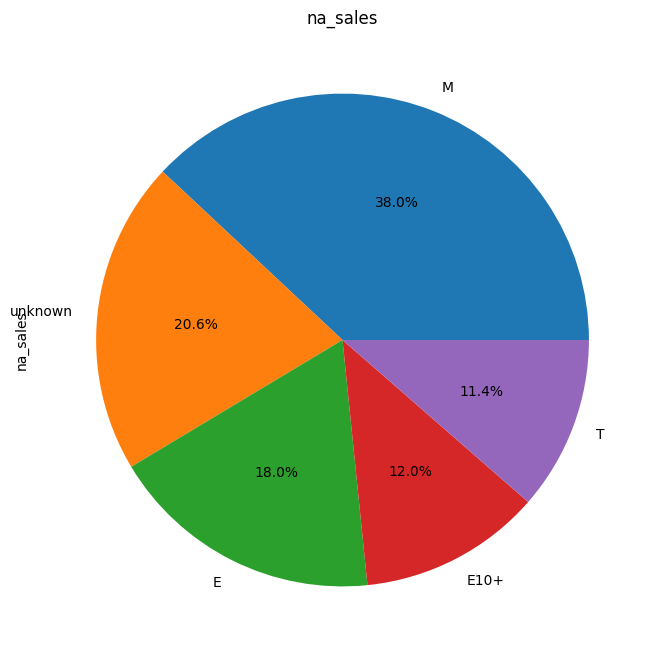

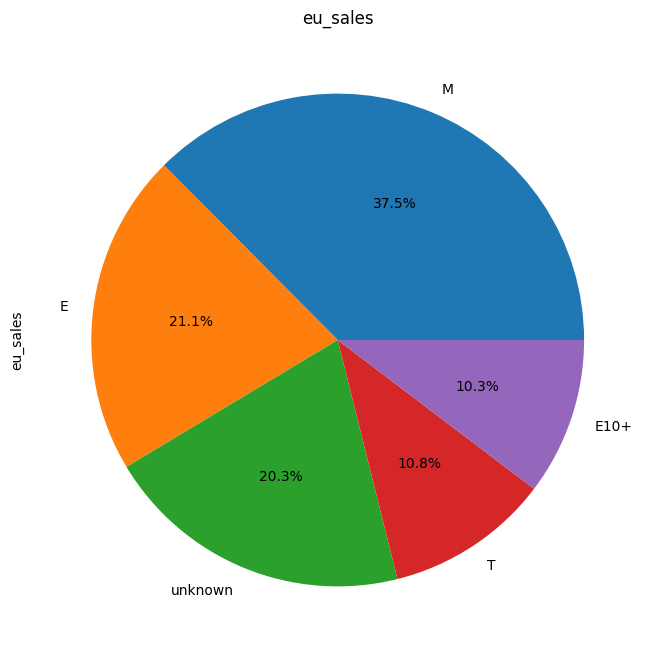

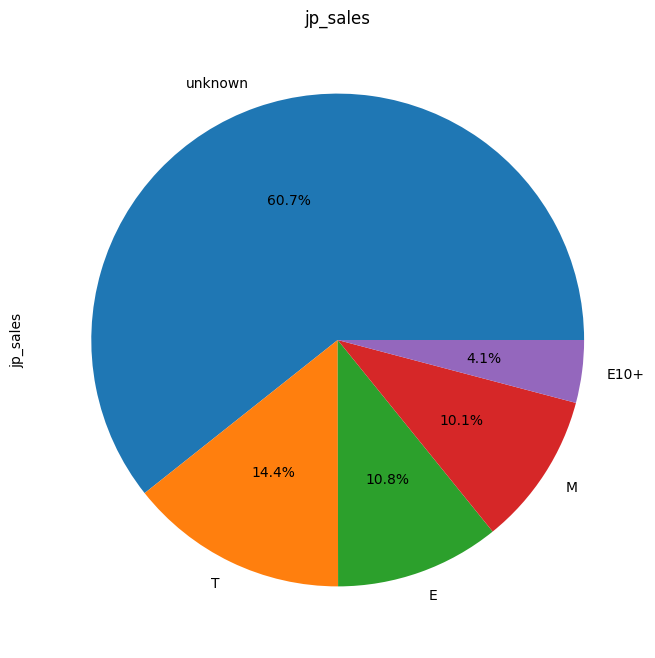

In [85]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions_sales:
    result_data.pivot_table(index='rating', values=region, aggfunc='sum').sort_values(region, ascending=False).plot(kind='pie', y=region, autopct='%1.1f%%', figsize=(12,8), legend=False, title = region)

В Северной Америке и Европе больше всего продаж приходится на рейтинг "M" (38 % b 37.5% соответственно) на втором месте по продажам, если не брать в расчет игры с неизвестным рейтингом, игры с рейтингом "E" (18% и 21,1% соответственно). В Японии ситуация другая: первое место, если не считать игр с неизвестным рейтингом занимает рейтинг "T" (14,4%), на втором месте рейтин "E" (10,8%). 

### Вывод

Я составила портрет пользователя каждого региона и выяснила следующее:

**В Северной Америке** самой популярной платформой является PS4 (28,3%), в целом продажи между пятью лидирующими платформами распределены почти равномерно. Среди жанров лидирует "Action" (33,5%), за ним с небольшим отрывом идет жанр "Shooter" (29,4%). Жанры "Sports" (17,5%), "Role-Playing" (12,5%), "Misc" (7,2%) занимают 3, 4 и 5 места соответственно. Больше всего продаж приходится на рейтинг "M" (38 %) на втором месте по продажам, если не брать в расчет игры с неизвестным рейтингом, игры с рейтингом "E" (18%)
    
**В Европе** PS4 (42,5%) лидирует, на ее долю приходится одна треть продаж среди пяти самых популярных платформ.  Среди жанров идирует жанр "Action" (36,2%), за ним с небольшим отрывом идет жанр "Shooter" (27,3%). Жанры "Sports" (18,7%), "Role-Playing" (11.5%), занимают 3, 4, а на последнем место по популярности здесь "Racing" (6,2%), а не "Misc". Больше всего продаж приходится на рейтинг "M" (37.5%) на втором месте по продажам, если не брать в расчет игры с неизвестным рейтингом, игры с рейтингом "E" (21,1%)
    
**В Японии** половина продаж среди пяти самых популярных платформ приходится на долю 3DS (49,8%). PS4 только на 4 месте (11,7%). В первую пятерку по жанрам входят почти такие же жанры, как в Северной Америке и Европе. Здесь на первом месте "Role-Playing" (44,6%), на втором "Action" (35%), на третьем "Misc" (8%), на четвертом "Fighting" (6,7%), на пятом "Shooter"(5,8%). С распредление по рейтингу ситуация тоже отличается от Америки и Европы: первое место занимает рейтинг "T" (14,4%), на втором месте рейтин "E" (10,8%).

## Проверка гипотез

### Проверим гипотезу, что пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Пользовательские рейтинги платформ Xbox One и PC равны.

H1: Пользовательские рейтинги платформ Xbox One и PC не равны.

In [86]:
data_xbox_one = result_data.query('platform=="XOne" and user_score > -1')

In [87]:
data_pc = result_data.query('platform=="PC" and user_score > -1')

In [88]:
alpha = 0.05
data_xbox_one_score = data_xbox_one['user_score']
data_pc_score = data_pc['user_score']
results = st.ttest_ind(data_xbox_one_score, data_pc_score)
print('P-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Значение P-value равно 14 %, поэтому у меня достаточно оснований полагать, что пользовательские рейтинги платформ Xbox One и PC равны.

### Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные

H0: Пользовательские рейтинги жанров Action и Sports равны.

H1: Пользовательские рейтинги жанров Action и Sports не равны.

In [89]:
data_action = result_data.query('genre=="Action" and user_score > -1')

In [90]:
data_sports = result_data.query('genre=="Sports" and user_score > -1')

In [91]:
alpha = 0.05
data_action_genre = data_action['user_score']
data_sports_genre = data_sports['user_score']

results = st.ttest_ind(data_action_genre, data_sports_genre)
print('P-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Значение P-value очень маленькое, поэтому у меня достаточно отвергнуть нулевую гипотезу и предположить, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

Я проверила выдвинутые гипотезы и могу сказать следующее:
* У меня достаточно оснований полагать, что пользовательские рейтинги платформ Xbox One и PC равны.
* У меня достаточно оснований полагать, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

В данном проекте я выполнила следующие шаги:
* **Выполнила предобработку данных:** 
    * Заменила названия столбцов
    * Привела столбцы к правильному типу данных
    * Обработала пропущенные значения, дубликаты, аномальные значения
    * Создала новый столбец с суммарными продажами во всех регионах
    
* **Провела исследовательский анализ данных и сделала следующие выводы:**
    * Больше всего игр было выпущено в 2008 году - 1101, меньше всего в 1980 - всего 9. Колчество выпускаемых игр в год росло до 2008 года, а потом начало снижаться
    * Больше всего продаж за все годы у первых 6 платформ: "PS2", "X360", "PS3", "Wii", "PS", "DS", у остальных сумма продаж в два и более раз меньше, на последнем месте "PCFX". У самых популярных платформ больше всего игр было продано в 2008 года, меньше всего в 1985 и 2016 года, до 2008 года суммы продаж росли, потом начали падать
    * В основном платформы существуют не больше 11 лет, 25% платформ "не доживают" до трех лет, средний показатель - 6 лет. Есть также платформы-долгожители, они существуют 28 лет и 31 год;
    * Последние несколько лет суммы продаж всех платформ падают, пожалуй, самыми прибыльными остаются PS4, PS3 и XOne;
    * Построив график "ящик с усами" для глобальных продаж в разбивке по платформам, я выяснила, что по всем платформам есть выбросы по продажам, по некотором (например, Wii) очень значительные
    * Изучив связь между оценками пользователей и критиков и суммой продаж, линейной связи я не обнаружила. Ее либо нет, либо она имеет более сложную природу
    * На графике мы видим, что самые прибыльные игры в жанре "Shooter", "Sports" и "Platform", на последнем месте "Adventure".
    
* **Я составила портрет пользователя каждого региона и выяснила следующее:**
    * **В Северной Америке** самой популярной платформой является PS4 (28,3%), в целом продажи между пятью лидирующими платформами распределены почти равномерно. Среди жанров лидирует "Action" (33,5%), за ним с небольшим отрывом идет жанр "Shooter" (29,4%). Жанры "Sports" (17,5%), "Role-Playing" (12,5%), "Misc" (7,2%) занимают 3, 4 и 5 места соответственно. Больше всего продаж приходится на рейтинг "M" (38 %) на втором месте по продажам, если не брать в расчет игры с неизвестным рейтингом, игры с рейтингом "E" (18%)
    * **В Европе** PS4 (42,5%) лидирует, на ее долю приходится одна треть продаж среди пяти самых популярных платформ.  Среди жанров идирует жанр "Action" (36,2%), за ним с небольшим отрывом идет жанр "Shooter" (27,3%). Жанры "Sports" (18,7%), "Role-Playing" (11.5%), "занимают 3, 4, а наи последнем место по популярность здесь "Racing" (6,2%), а не "Misc". Больше всего продаж приходится на рейтинг "M" (37.5%) на втором месте по продажам, если не брать в расчет игры с неизвестным рейтингом, игры с рейтингом "E" (21,1%)
    * **В Японии** половина продаж среди пяти самых популярных платформ приходится на долю 3DS (49,8%). PS4 только на 4 месте (11,7%). В первую пятерку по жанрам входят почти такие же жанры, как в Северной Америке и Европе. Здесь на первом месте "Role-Playing" (44,6%), на втором "Action" (35%), на третьем "Misc" (8%), на четвертом "Fighting" (6,7%), на пятом "Shooter"(5,8%). С распредление по рейтинуг ситуация тоже отличается от Америки и Европы: первое место занимает рейтинг "T" (14,4%), на втором месте рейтин "E" (10,8%
    
* **Я проверила гипотезы и сделала следующие выводы:**
    * У меня достаточно оснований полагать, что пользовательские рейтинги платформ Xbox One и PC равны
    * У меня достаточно оснований полагать, что средние пользовательские рейтинги жанров Action и Sports разные
   
   **На основе проделанной работы могу рекомендовать следующее:**
   Особое внимание интернет-магазину надо уделить играм таких платформ, как PS4, PS3 и XOne, они самые прибыльные за последние 4 года. 
   Тем не менее сумму продаж последние несколько лет падают на всех платформах. Возможно стоит уделить больше внимания привлечению клиентов. 
   Среди жанров в странах Европы и в Северной Америке лидируют "Action", "Shooter", "Sports". Игры в этих жанрах принесут основную часть прибыли магазину.
   Также могу посоветовать интернет-магазину выстроить отдельный план работы с Японией. Показатели по жанрам и платформам в этой стране отличаются от показателей в других странах.